<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

__________________________________________________

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

from src import soporte_clustering as sc
from src import funciones_outliers as fo
from src import funciones_estandarizacion as fes

In [2]:
df = pd.read_csv("datos/WrestlingWorldTournament.csv", index_col=0)

5 registros aleatorios:


,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
283,Lavone Philbrook,Female,30,166.0,Australia,81,"Karate, MMA",1,5,8,4,Consejo Global de Lucha Libre,2006,358
277,Larry Perez,Male,29,185.0,USA,100,"Boxing, Judo, Kick-Boxing, MMA",5,7,8,7,World Wrestling Entertainment,2007,11
384,Reba Hatcher,Female,32,170.5,USA,84,Karate,3,4,7,7,World Wrestling Entertainment,2011,429
43,Betty Jones,Female,35,167.5,Egypt,83,MMA,3,2,8,6,Consejo Global de Lucha Libre,2003,412
96,Colleen Campbell,Female,30,173.0,Argentina,89,Boxing,3,5,5,7,World Wrestling Entertainment,2002,414




(500, 14)
Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB
None


Duplicados en el DataFrame:
0


Estadísticas descriptivas de las columnas numér

,count,mean,std,min,25%,50%,75%,max
age,500.0,31.154,5.438514,18.0,27.00,31.0,35.000,53.0
height,500.0,174.864,9.468623,152.0,167.50,174.0,181.625,202.0
weight,500.0,89.688,11.081889,65.0,81.00,89.0,98.000,123.0
hours_per_day,500.0,3.064,1.375386,0.0,2.00,3.0,4.000,8.0
strength,500.0,6.152,1.567741,2.0,5.00,6.0,7.000,10.0
agility,500.0,7.148,1.455449,3.0,6.00,7.0,8.000,10.0
mental,500.0,6.732,1.197934,3.0,6.00,7.0,8.000,10.0
year_start,500.0,2007.130,6.325910,1986.0,2003.00,2007.0,2011.000,2021.0
rank,500.0,250.500,144.481833,1.0,125.75,250.5,375.250,500.0




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
name,500,500,Zenaida Flagge,1
gender,500,2,Female,265
nationality,500,8,France,118
sports,500,31,Karate,42
federation,500,3,Fight Zone Wrestling,206




Número de valores nulos por columna:
name             0
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
federation       0
year_start       0
rank             0
dtype: int64


Distribución de valores categóricos:

Columna: name
name
Zenaida Flagge          1
Aaron Peavy             1
Abe Rutland             1
Adrian Quinn            1
Viola Lonergan          1
                       ..
Alfred Ray              1
Alexander Bracamonte    1
Alexander Boone         1
Alex Harris             1
Albertha Rodriguez      1
Name: count, Length: 500, dtype: int64

Columna: gender
gender
Female    265
Male      235
Name: count, dtype: int64

Columna: nationality
nationality
France       118
Japan        116
USA          115
Australia     64
Egypt         42
England       26
Argentina     12
India          7
Name: count, dtype: int64

Columna: sports
sports


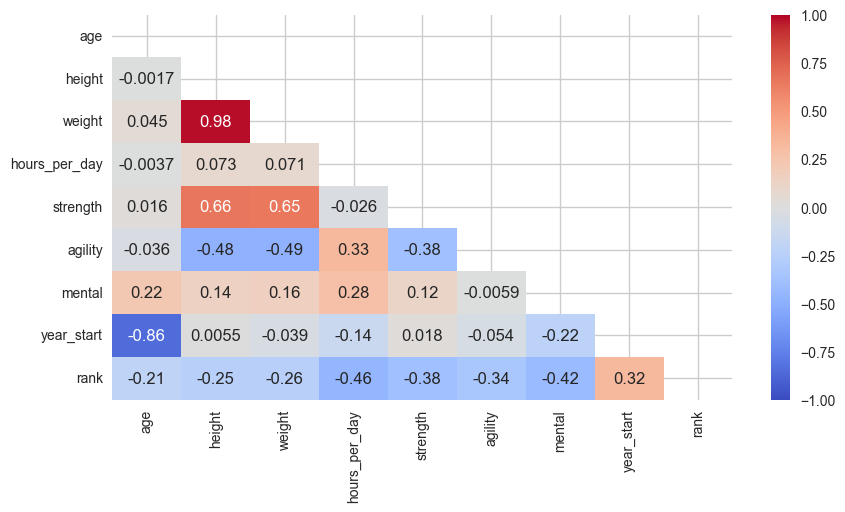

In [3]:
sop_clust = sc.Exploracion(df)
sop_clust.explorar_datos()

- No hay nulos.
- Observando las distintas columnas vemos alguna que realmente no aportan nada a nuestra segmentación en clusters como puede ser name, federation, rank o year_start, por lo que eliminamos estas columnas.
- Viendo los valores de la categoría sport vemos que todas son artes marciales y hay demasiadas categorías distintas que haces distintas combinaciones en base a distintas modalidades, por lo tanto, como en general son todo artes marciales y al tener tantas categorías tan parecidas al intentar hace clusters si tenemos esta variable va a hacer más ruido de lo que nos va a ayudar, por lo tanto la eliminamos.
- En cuanto a la correlación de las variables vemos que la más fuerte es peso y altura, también la fuerza con la atura y el peso, por lo general nos cuadran todos los datos de la matriz de correlación a excepción de rank, a mayor rango menor fuerza, altura, horas entrenadas al dia... esto no acaba de tener sentido, pero como vamos a eliminar la columna es un buen arreglo. 

In [4]:
df.drop(columns=["name", 'sports', 'federation', 'year_start', 'rank'], inplace=True)

In [5]:
df.duplicated().sum()

np.int64(0)

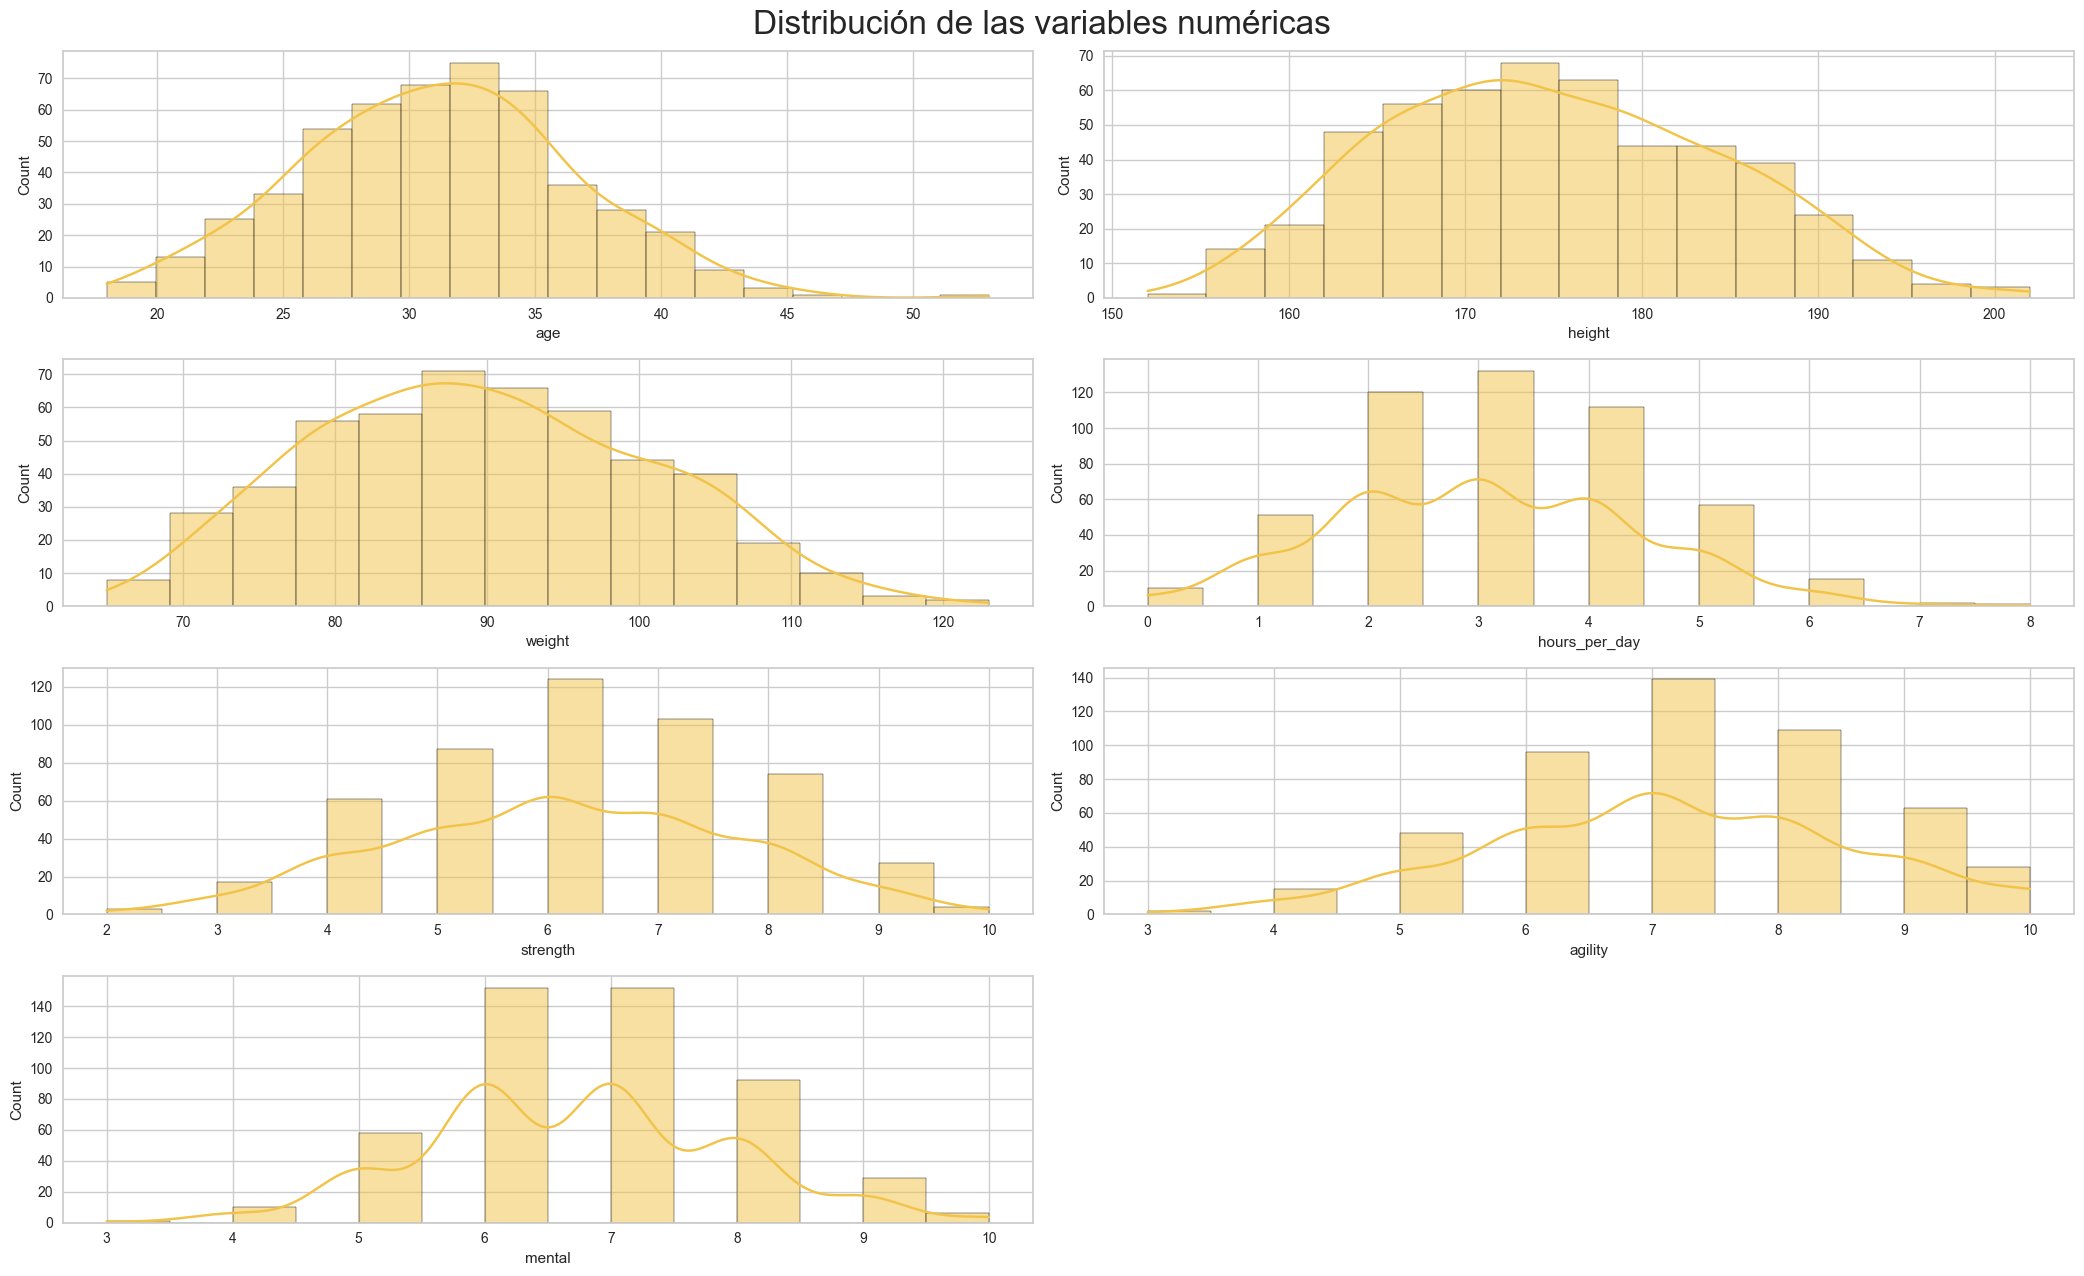

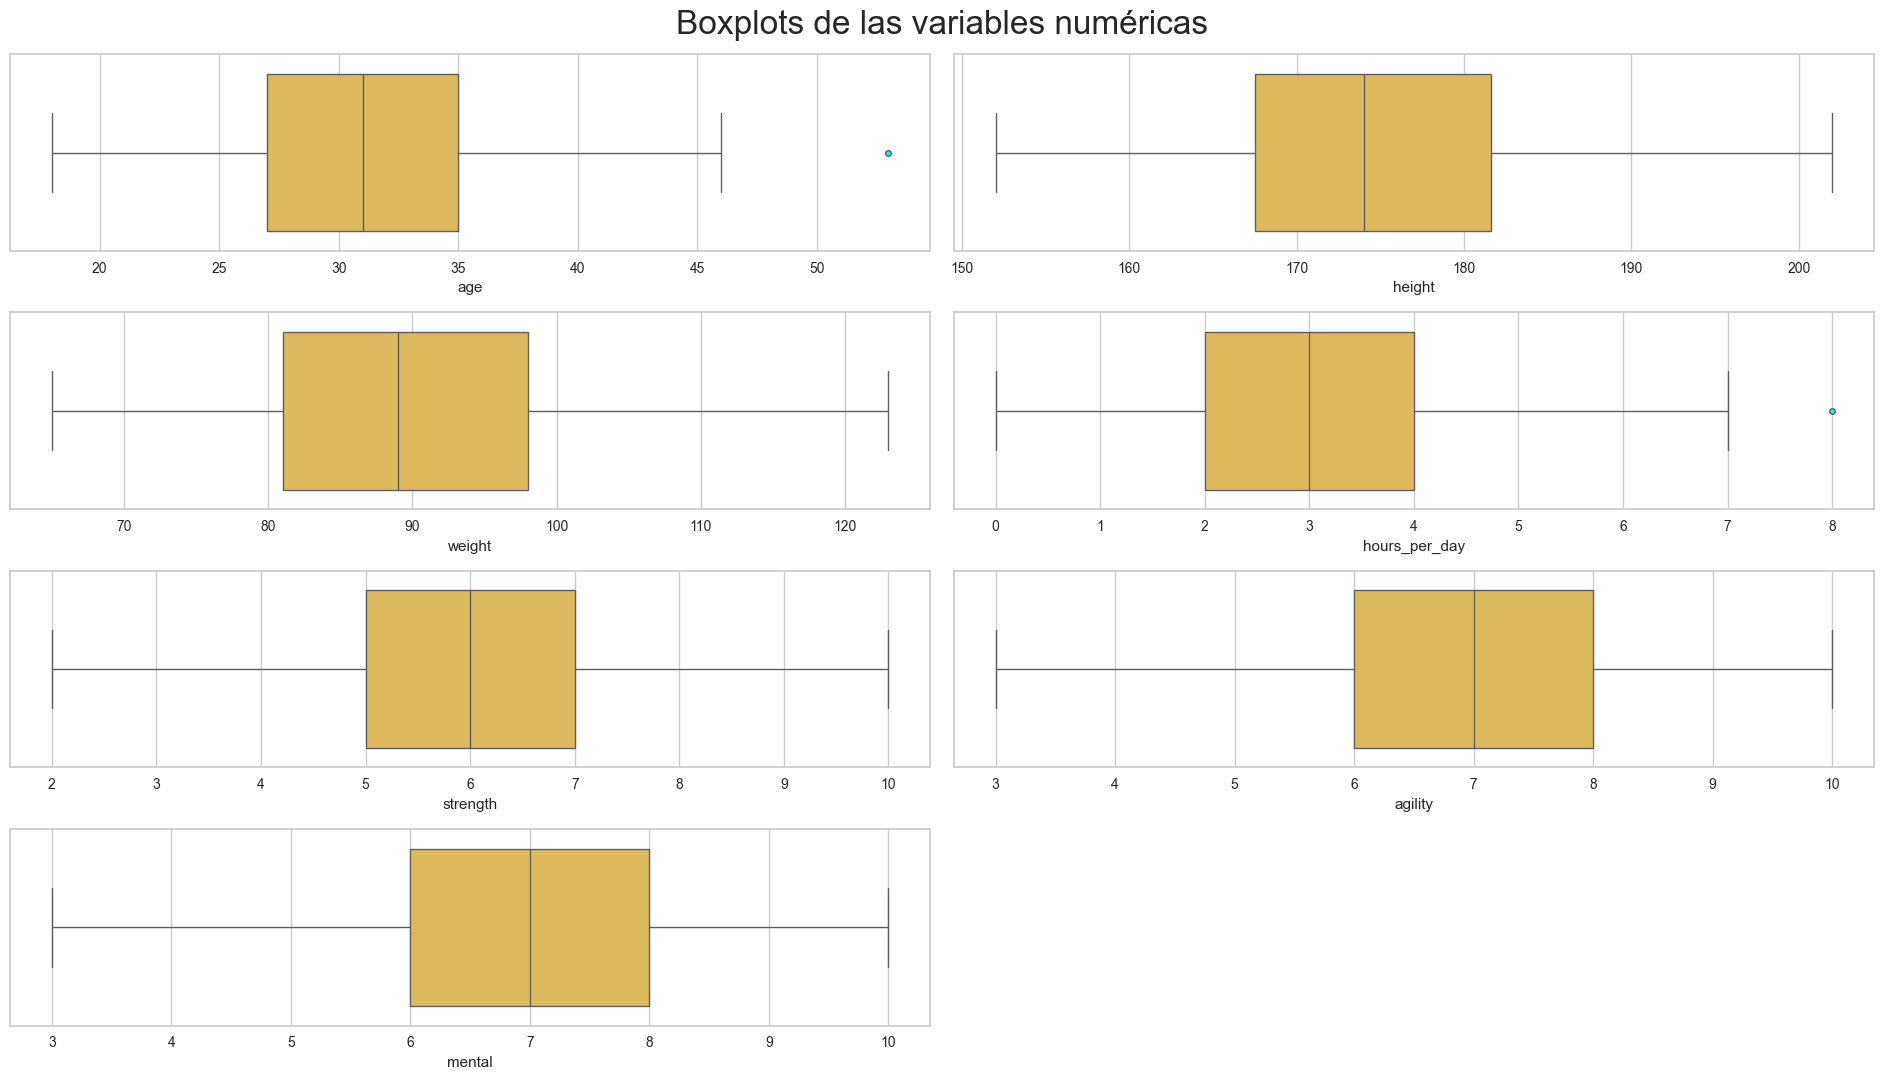

In [6]:
sop_clust.visualizar_numericas()

Visualizando las variables numéricas vemos que algunas parecen tener una distribución medianamente normla como edad, altura y peso. Las variables horas por día, fuerza, agilidad y mental se comportan como categóricas, sin embargo, no las paso a categóricas ya que posteriormente al hacer el encoding las devolvería a sus valores numéricos originales. por lo que mantenemos las variables numéricas como están. En cuanto a los outliers univariados podemos ver que hay una persona de unos 50 años y otra persona que entrena 8 horas al día, veamoslo:

In [7]:
display(df[df["age"]>50])
display(df[df["hours_per_day"]>7])

,gender,age,height,nationality,weight,hours_per_day,strength,agility,mental
324,Female,53,171.0,Japan,87,3,5,9,6


,gender,age,height,nationality,weight,hours_per_day,strength,agility,mental
50,Male,27,202.0,England,123,8,7,7,8


Ambos valores parecen correctos viendo el conjunto de los datos, por lo que los mantenemos.

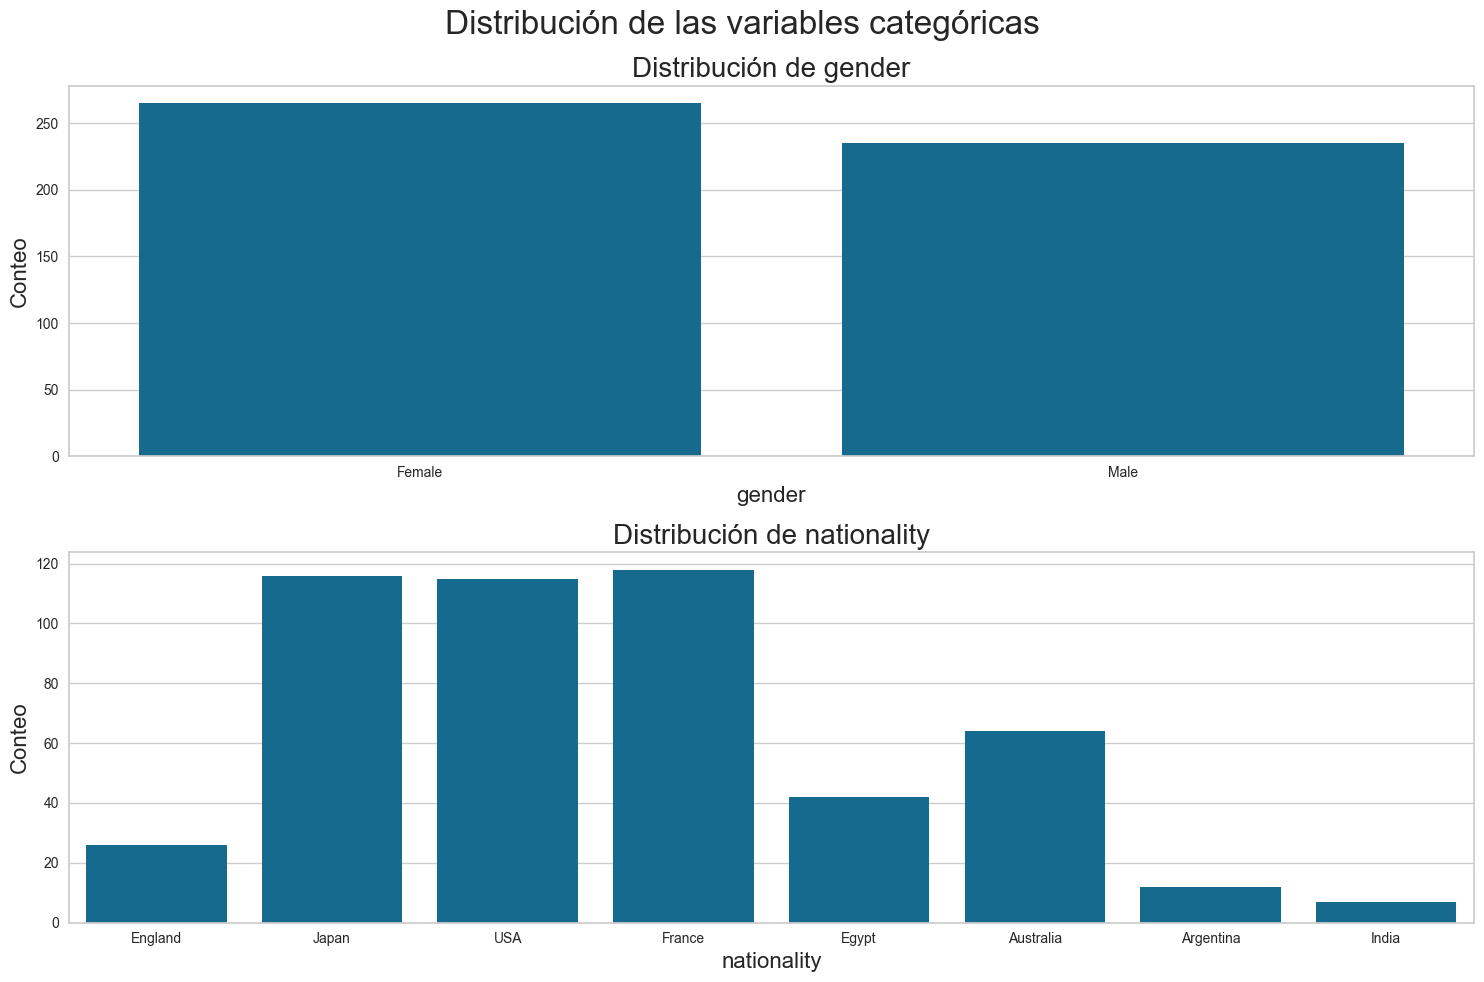

In [8]:
sop_clust.visualizar_categoricas()

Como podemos ver los generos están bastane equilibrados a diferencia de las nacionalidades que hay 3 principales y el resto son más bajas.

___________________________

### **Encoding**

In [9]:
df.dtypes

gender            object
age                int64
height           float64
nationality       object
weight             int64
hours_per_day      int64
strength           int64
agility            int64
mental             int64
dtype: object

In [10]:
preprop = sc.Preprocesado(df)
df, one_hot_encoder = preprop.one_hot_encoding(["gender"])
df_encoded = preprop.frequency_encoding(["nationality"])

df_encoded.drop(columns=["gender"], inplace=True)

In [11]:
df_encoded

,age,height,nationality,weight,hours_per_day,strength,agility,mental,gender_Female,gender_Male
0,41,165.0,0.052,82,3,7,8,7,1.0,0.0
1,36,185.0,0.232,100,0,8,5,9,0.0,1.0
2,29,178.5,0.232,93,4,8,8,7,0.0,1.0
3,39,187.5,0.232,107,3,7,6,8,0.0,1.0
4,29,158.0,0.230,72,1,5,7,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
495,34,185.5,0.236,104,2,9,6,5,0.0,1.0
496,31,161.5,0.236,71,5,4,9,6,1.0,0.0
497,22,188.5,0.236,102,3,8,8,7,0.0,1.0
498,32,177.0,0.236,92,2,5,5,5,1.0,0.0


### **Outliers**

In [12]:
multi = fo.GestionOutliersMultivariados(df_encoded)
contaminacion = [0.01, 0.05, 0.1]
estimadores = [10, 100, 200]

df_outliers = multi.detectar_outliers_if(df_encoded.columns, "", contaminacion, estimadores, False)

In [13]:
df_outliers["porcentaje_outliers"] = df_outliers.filter(like="outliers").apply(lambda x: round(sum(x==-1)/len(x),2), axis=1)

porcentaje = 0.6
df_outliers_porcentaje = df_outliers[df_outliers["porcentaje_outliers"]>porcentaje]
df_restante = df_outliers[df_outliers["porcentaje_outliers"]<porcentaje]

print(f"Tenemos un {round(df_outliers_porcentaje.shape[0]/df_outliers.shape[0]*100, 2)}% de outliers respecto al total de los datos.")

Tenemos un 2.6% de outliers respecto al total de los datos.


In [14]:
df_outliers_porcentaje

,age,height,nationality,weight,hours_per_day,strength,agility,mental,gender_Female,gender_Male,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_200,porcentaje_outliers
35,32,155.5,0.236,68,5,4,10,8,1.0,0.0,-1,1,1,-1,-1,-1,-1,-1,-1,0.78
46,29,159.5,0.024,72,0,4,8,6,1.0,0.0,-1,-1,1,-1,-1,-1,-1,-1,-1,0.89
50,27,202.0,0.052,123,8,7,7,8,0.0,1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.00
58,24,198.5,0.236,117,3,9,4,7,0.0,1.0,1,1,1,-1,-1,-1,-1,-1,-1,0.67
146,28,163.5,0.128,76,1,6,6,4,0.0,1.0,1,1,1,-1,-1,-1,-1,-1,-1,0.67
170,25,195.5,0.236,114,1,7,3,6,0.0,1.0,1,1,1,-1,-1,-1,-1,-1,-1,0.67
208,19,166.5,0.232,78,2,4,4,4,1.0,0.0,1,1,-1,-1,-1,-1,-1,-1,-1,0.78
223,40,195.0,0.052,114,4,6,5,7,0.0,1.0,1,-1,1,-1,-1,-1,-1,-1,-1,0.78
295,34,152.0,0.232,65,2,5,10,8,1.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1,0.67
411,40,188.0,0.128,108,2,8,3,9,0.0,1.0,1,1,1,-1,-1,-1,-1,-1,-1,0.67


Estos datos a pesar de ser outliers parecen tener sentido y corresponder  atletas reales, por lo tanto como primera aproximación los mantenemos.

In [15]:
df_encoded_outliers = df_encoded.copy()

### **Estandarización**

In [16]:
pd.set_option("display.max_columns", None)

modelos_estand = ["standar", "robust", "minmax"]

df_estand, dic_scaler = fes.estandarizacion(df_encoded_outliers, df_encoded_outliers.columns, modelos_estand)
df_estand.head()

,age,height,nationality,weight,hours_per_day,strength,agility,mental,gender_Female,gender_Male,age_standar,height_standar,nationality_standar,weight_standar,hours_per_day_standar,strength_standar,agility_standar,mental_standar,gender_Female_standar,gender_Male_standar,age_robust,height_robust,nationality_robust,weight_robust,hours_per_day_robust,strength_robust,agility_robust,mental_robust,gender_Female_robust,gender_Male_robust,age_minmax,height_minmax,nationality_minmax,weight_minmax,hours_per_day_minmax,strength_minmax,agility_minmax,mental_minmax,gender_Female_minmax,gender_Male_minmax
0,41,165.0,0.052,82,3,7,8,7,1.0,0.0,1.812234,-1.042800,-1.982825,-0.694439,-0.046579,0.541447,0.585973,0.223943,0.941697,-0.941697,1.250,-0.637168,-1.711538,-0.411765,0.0,0.5,0.5,0.0,0.0,0.0,0.657143,0.26,0.171171,0.293103,0.375,0.625,0.714286,0.571429,1.0,0.0
1,36,185.0,0.232,100,0,8,5,9,0.0,1.0,0.891945,1.071555,0.615973,0.931459,-2.229969,1.179947,-1.477311,1.895156,-1.061913,1.061913,0.625,0.778761,0.019231,0.647059,-1.5,1.0,-1.0,1.0,-1.0,1.0,0.514286,0.66,0.981982,0.603448,0.000,0.750,0.285714,0.857143,0.0,1.0
2,29,178.5,0.232,93,4,8,8,7,0.0,1.0,-0.396461,0.384390,0.615973,0.299165,0.681218,1.179947,0.585973,0.223943,-1.061913,1.061913,-0.250,0.318584,0.019231,0.235294,0.5,1.0,0.5,0.0,-1.0,1.0,0.314286,0.53,0.981982,0.482759,0.500,0.750,0.714286,0.571429,0.0,1.0
3,39,187.5,0.232,107,3,7,6,8,0.0,1.0,1.444118,1.335850,0.615973,1.563753,-0.046579,0.541447,-0.789550,1.059549,-1.061913,1.061913,1.000,0.955752,0.019231,1.058824,0.0,0.5,-0.5,0.5,-1.0,1.0,0.600000,0.71,0.981982,0.724138,0.375,0.625,0.428571,0.714286,0.0,1.0
4,29,158.0,0.230,72,1,5,7,7,1.0,0.0,-0.396461,-1.782824,0.587097,-1.597716,-1.502172,-0.735551,-0.101789,0.223943,0.941697,-0.941697,-0.250,-1.132743,0.000000,-1.000000,-1.0,-0.5,0.0,0.0,0.0,0.0,0.314286,0.12,0.972973,0.120690,0.125,0.375,0.571429,0.571429,1.0,0.0


In [17]:
scaler="minmax"
df_scaled = df_estand.loc[:, df_estand.columns.str.contains(f"{scaler}", case=False)]
df_scaled.columns = df_scaled.columns.str.replace("_minmax", "", regex=False)

df_scaled.head(2)

,age,height,nationality,weight,hours_per_day,strength,agility,mental,gender_Female,gender_Male
0,0.657143,0.26,0.171171,0.293103,0.375,0.625,0.714286,0.571429,1.0,0.0
1,0.514286,0.66,0.981982,0.603448,0.000,0.750,0.285714,0.857143,0.0,1.0


In [18]:
df_encoded_outliers_scaled = df_scaled.copy()

## **Modelo de Clustering**

Usaremos Kmeans ya que es el que hemos visto en clase, para ello primero necesitamos saber cuántos clusters generar. Para ello usaremos KElbowVisualizer:

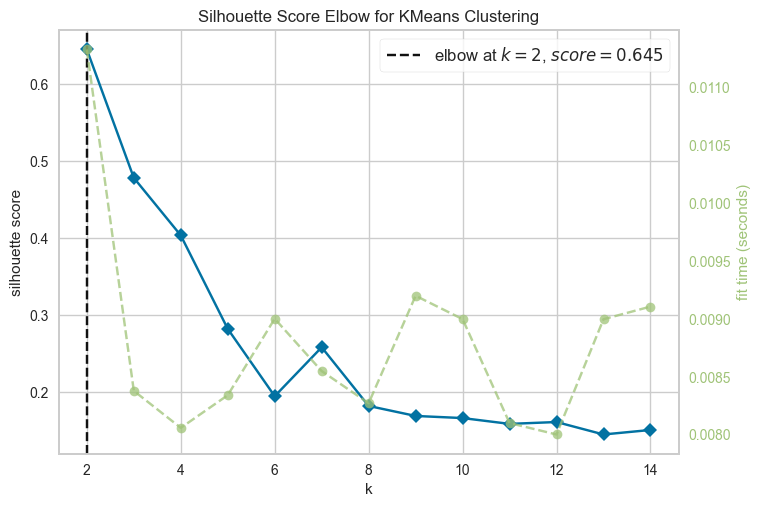

In [21]:
clust = sc.Clustering(df_encoded_outliers_scaled)
clust.sacar_clusters_kmeans()

Probaremos con dos clusters ya que es el elbow que hemos obtenido con un score de 0.586.

In [22]:
df_kmeans, labels = clust.modelo_kmeans(df_encoded_outliers_scaled, 2)
display(df_kmeans.head())
clust.calcular_metricas(labels)

,age,height,nationality,weight,hours_per_day,strength,agility,mental,gender_Female,gender_Male,clusters_kmeans
0,0.657143,0.26,0.171171,0.293103,0.375,0.625,0.714286,0.571429,1.0,0.0,1
1,0.514286,0.66,0.981982,0.603448,0.000,0.750,0.285714,0.857143,0.0,1.0,0
2,0.314286,0.53,0.981982,0.482759,0.500,0.750,0.714286,0.571429,0.0,1.0,0
3,0.600000,0.71,0.981982,0.724138,0.375,0.625,0.428571,0.714286,0.0,1.0,0
4,0.314286,0.12,0.972973,0.120690,0.125,0.375,0.571429,0.571429,1.0,0.0,1


,silhouette_score,davies_bouldin_index,cardinalidad
0,0.644917,0.546561,"{0: 235, 1: 265}"


Probando distintos tipos de estandarización vemos que con minmax obtenemos las mejores métricas, tenemos un silhouette_score más cercano a 1 que a 0 y hemos conseguido que davies_bouldin_index sea menor que 1, ya que con los otros sclares siempre era mayor a 1. Además, ambos clusters están bastante balanceados.

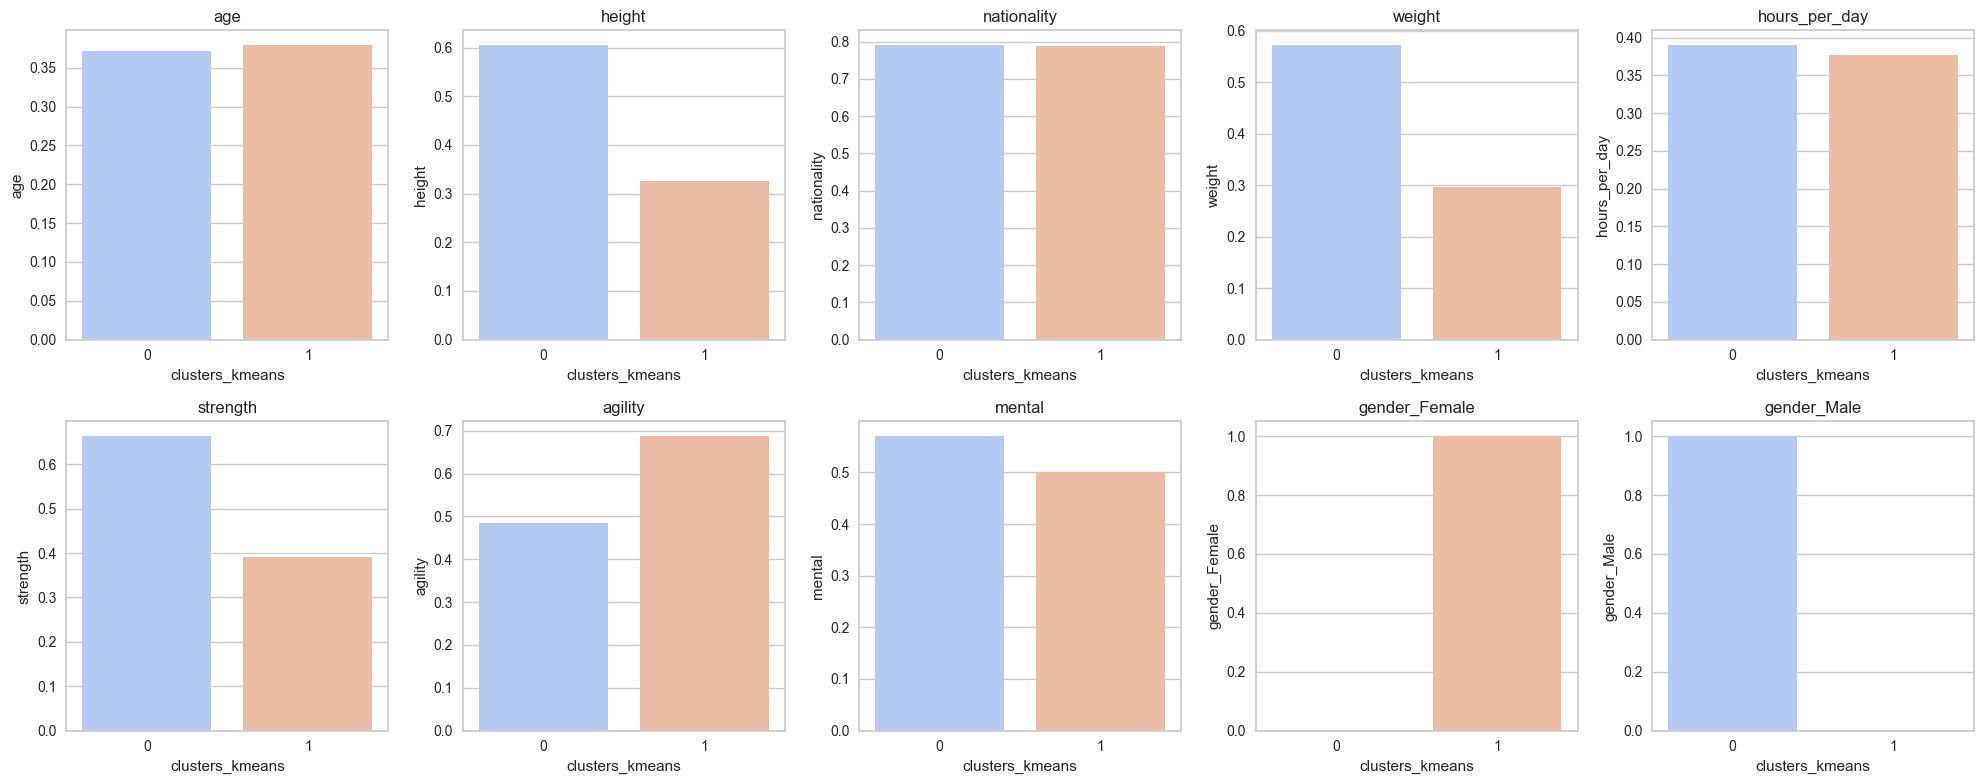

In [25]:
clust.plot_clusters()

La principal diferencia entre clusters es claramente que uno es solo de hombres, el 0, y otro solo de mujeres, el 1. La altura y el peso son claramente factores diferenciales, lo cual es bastante lógico pues las mujeres por lo general suelen ser de media más bajas y pesar menos. Las nacionalidades, las edades y las horas entreandas al día no son un factor diferencial. Además, la fuerza también varía mucho de un grupo a otro y la agilidad, en menor medidad el factor mental. 

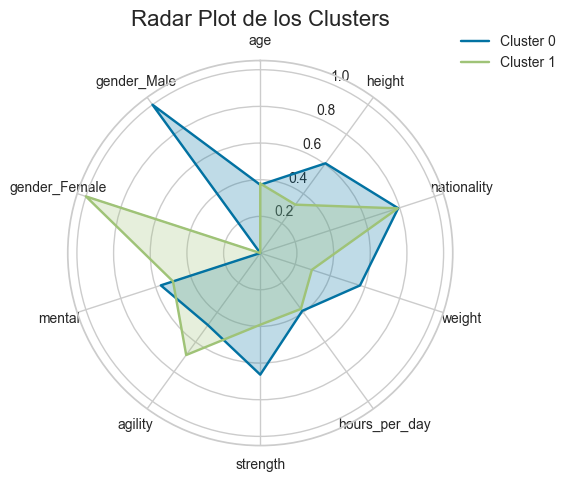

In [36]:
clust.radar_plot("kmeans", figsize=(5, 5))

Por lo tanto, podemos concluir apoyándonos en el radar plot que:
- El custer 0 consiste en hombres de mayor altura, peso y fuerza de media y ligeramente menores en agilidad que las personas del cluster 1.
- El cluster 1 son mujeres de media con menor peso, fuerza y altura que los individiuos del otro cluster y más ágiles.

Por lo que esta división a la hora de diseñar diferentes entrenamientos para los distintos grupos parece bastante lógica pues tiene en cuenta las fortalezas y debilidades de cada gtupo. Por lo tanto, en el cluster 0 se pueden centrar en entrenar con pesos más grandes o intentar mejorar su aglidad, mientras que en el cluster 1 intentará mejorar la fuerza y perfeccionar la agilidad.